# The numpy.random package 

## Programming for Data Analysis Assignment

### Andrew Walker - G00398788@gmit.ie

![numpy.org](https://numpy.org/doc/stable/_static/numpylogo.svg)

## 1. Introduction

This notebook contains an explanation of the ```numpy.random``` package in Python. 

NumPy is an open source project aiming to enable numerical computing with Python<sup id="a1">[1](#f1)</sup>. It is used for working with arrays and also has functions for working in the domain of linear algebra, fourier transform, and matrices<sup id="a2">[2](#f2)</sup>. In has applications in a wide range of fields such as astronomy, physics, engineering, and economics. 

The ```numpy.random``` package within NumPy is used to generate a sequence of numbers which approximate the properties of random numbers. The sequence of numbers that is generated is statistically random and can be used in a wide range of applications.    

The package generates the sequence with the use of a BitGenerator and a Generator. The BitGenerator uses a seed to derive the initial state and create a sequence of statistically random numbers bits. The Generator converts the sequence of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution<sup id="a3">[3](#f3)</sup>. 

This notebook will explain the following overarching features of the ```numpy.random``` package:

- Simple random data
- Permutations
- The purpose of five Distribution functions
    - Uniform 
    - Normal
    - Weibull
    - Binomial
    - Multinomial
- The use of seeds in generating pseudo-random numbers

The notebook will explain each feature and the functions contained in each using code, plots, and diagrams where required. 

Use of the notebook requires the following Python packages to be initalised:

- ```numpy.random```
- ```matplotlib.pyplot```

In addition, a Generator needs to be constructed. 

The initialisation will be done in Section 2 of this Notebook.


At the time of writing this notebook, the most recent release of ```numpy.random``` is 1.21.0. This contents of this notebook are based on this release.

## 2. Initalising the Required Python Packages

Import NumPy:

In [1]:
import numpy as np

Construct a new Generator with the default BitGenerator (PCG64): 

In [2]:
rng = np.random.default_rng()

A seed can be specified in ```default_rng```. The use of a known seed means that the the algorithm is repeatable. BitGenerators and seeds are discussed further in Section 5.

Pyplot will also be used to allow plotting of outputs generated, where required:

In [3]:
import matplotlib.pyplot as plt

## 3. Simple Random Data

The ```numpy.random``` package contains four functions to generate simple random data. These are discussed in this section.

### 3.1 Integers


NumPy can be instructed to return random integers<sup id="a4">[4](#f4)</sup>. For example:

In [4]:
rng.integers(0, 3, size=5)

array([1, 1, 2, 1, 2], dtype=int64)

In this example, the first parameter (```0```) sets the lowest integer that is possible to be generated. The upper limit is defined by the second parameter (```3```); the highest integer that is possible to be generated is one lower than this number. The parameter ```size=5``` designates that 5 random numbers should be generated.  

The shape of the output can be changed by specifying the number of rows and columns. For example, a 5 x 5 array containing random numbers between 0 and 9 can be generated using the following:

In [5]:
rng.integers(0, 10, size=(5,5))


array([[6, 0, 6, 7, 7],
       [7, 8, 4, 3, 1],
       [3, 2, 9, 1, 7],
       [8, 6, 3, 2, 2],
       [6, 5, 0, 0, 5]], dtype=int64)

In these examples, the output also includes the data type: ```dtype=int64```. By default, Python has the following data types:

- strings
- integer
- float
- boolean
- complex

NumPy also includes a number of additional data types (discussion of which is considered outside the scope of this notebook). 

```dtype=int64``` refers to the output containing 64-bit integers. This can be changed, as shown in the following example to output 8-bit integers:

In [6]:
rng.integers(0, 10, size=(5,5), dtype='int8')

array([[7, 8, 1, 9, 8],
       [7, 8, 3, 4, 1],
       [5, 6, 4, 8, 6],
       [6, 1, 8, 8, 7],
       [6, 4, 1, 0, 8]], dtype=int8)

The integers are generated by default as a discrete probability distribution. This means that the probability of outcomes is equally likely and with finite values<sup id="a5">[5](#f5)</sup>.

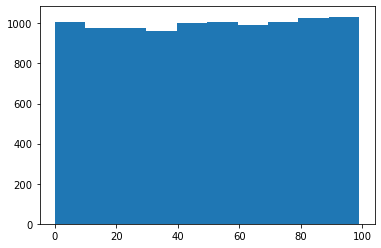

In [7]:
x = rng.integers(100, size=10000)
plt.hist(x)
plt.show()

### 2.2 Random

The NumPy random function returns random floats<sup id="a6">[6](#f6)</sup>. For example:

In [8]:
rng.random()

0.6893728318176913

The size of output can be specified:

In [9]:
rng.random(size=(5,5))

array([[3.03855097e-03, 8.27766776e-01, 7.53160543e-01, 8.09677144e-01,
        2.83696272e-01],
       [1.00411026e-01, 1.30635031e-01, 3.97656750e-04, 9.71310864e-02,
        1.87908779e-01],
       [1.42914745e-02, 9.37228022e-01, 8.68599319e-01, 6.67156814e-01,
        3.81607326e-02],
       [5.15046846e-01, 8.34376416e-02, 8.68424812e-01, 1.13183774e-01,
        1.51568875e-01],
       [7.99405352e-01, 4.74736660e-01, 8.88737126e-01, 7.34964529e-01,
        1.00892640e-01]])

To specify the low and high values the formula ```(b + a) * rng.random() + a``` can be used. The following example outputs five floats between 0 (inclusive) and 3 (exclusive):

In [10]:
a = 0 #low value
b = 3 #high value
x = rng.random(size=(5,5)) 
y = (b + a) * x + a
y

array([[1.88641928, 0.97979657, 0.53760477, 0.61370204, 0.59606   ],
       [1.41521643, 1.63809193, 0.19814893, 0.77776912, 2.95233094],
       [2.66814189, 0.77803955, 2.05378448, 2.23086718, 1.38397368],
       [0.17414754, 2.82880469, 0.97678501, 0.18440649, 0.3455068 ],
       [2.5941603 , 0.90752843, 0.51651795, 2.48348789, 0.51488474]])

Or for negative numbers between 0 (inclusive) and -1 (exclusive):

In [11]:
a = 0 
b = -1 
x = rng.random(size=(5,5)) 
y = (b + a) * x + a
y

array([[-0.09514188, -0.29251149, -0.34612766, -0.26978712, -0.53948949],
       [-0.99902214, -0.95151167, -0.76344846, -0.45245943, -0.7173797 ],
       [-0.237061  , -0.84465013, -0.01547344, -0.09347718, -0.77272128],
       [-0.09862735, -0.0139904 , -0.58985605, -0.88577006, -0.76495838],
       [-0.857581  , -0.72593022, -0.09657689, -0.27714324, -0.97655289]])

However, for negative numbers not including 0, the formula must be changed slightly. For example, for negative numbers between -1 (inclusive) and -2 (exclusive):

In [12]:
a = -1 
b = -2 
x = rng.random(size=(5,5))  
y = (b - a) * x + a
y

array([[-1.56073203, -1.29983009, -1.3659376 , -1.65877381, -1.69938759],
       [-1.72945719, -1.06580753, -1.33734965, -1.49232029, -1.49552141],
       [-1.82250988, -1.39268534, -1.18191849, -1.3234861 , -1.69058129],
       [-1.53070889, -1.13327663, -1.63996595, -1.66210278, -1.45404693],
       [-1.38196385, -1.40419844, -1.76919834, -1.11132329, -1.52573612]])

The floats are generated by default as a continuous probability distribution. This means that there are infinite number of equally likely measurable values<sup id="a7">[7](#f7)</sup>.  

<function matplotlib.pyplot.show(close=None, block=None)>

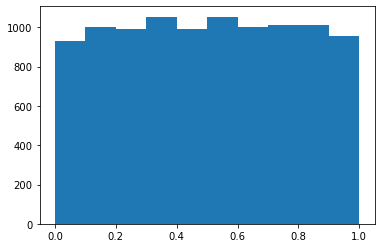

In [13]:
x = rng.random(size=10000)
plt.hist(x)
plt.show

### 2.3 Choice

The NumPy choice function generates a random sample from a given array<sup id="a8">[8](#f8)</sup>. For example:

In [14]:
rng.choice(10, 5)

array([0, 7, 8, 1, 3], dtype=int64)

This returns an array of 5 integers between 0 and 9 (inclusive) and is the equivalent of ```rng.integers(0, 10, 5)```.

By default, the distribution is uniform, as shown below:

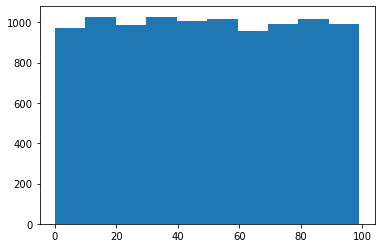

In [15]:
x = rng.choice(100, 10000)
plt.hist(x)
plt.show()

A non-uniform distribution can be generated by specifying parameter ```p``` for the probabilty of a choice occuring. For example:

In [16]:
rng.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([2, 0, 2], dtype=int64)

In this example, there is a 10% chance of 0 occuring for any the three numbers generated, a 0% percentage chance for a 1, a 30% chance for a 2, a 60% chance for a 3, and a 0% chance for a 4. 

Specifying parameter ```replace=False``` will result in an individual number not occurring more than once in the output:

In [17]:
rng.choice(10, 10, replace=False)

array([1, 5, 2, 0, 3, 9, 7, 4, 8, 6], dtype=int64)

The axis along which the choice is performed can also be selected. The 0 axis refers to rows, and the 1 axis refers to columns<sup id="a9">[9](#f9)</sup>. The default is 0 if this parameter is not set. For example: 

In [18]:
x = rng.choice([[0,1,2], [3,4,5], [6,7,8], [9,'A','B'], ['C','D','E']], 5, axis=0)
x

array([['3', '4', '5'],
       ['9', 'A', 'B'],
       ['3', '4', '5'],
       ['0', '1', '2'],
       ['3', '4', '5']], dtype='<U11')

The above output contains five rows with three elements: 

In [19]:
(x.shape)

(5, 3)

Setting the axis to 1:

In [20]:
x = rng.choice([[0,1,2], [3,4,5], [6,7,8], [9,'A','B'], ['C','D','E']], 5, axis=1)
x

array([['0', '2', '2', '1', '1'],
       ['3', '5', '5', '4', '4'],
       ['6', '8', '8', '7', '7'],
       ['9', 'B', 'B', 'A', 'A'],
       ['C', 'E', 'E', 'D', 'D']], dtype='<U11')

The above output contains five rows with five columns:

In [21]:
(x.shape)

(5, 5)

The choice function is not restricted to integers. For example:

In [22]:
season = ['spring', 'summer', 'autumn', 'winter']
rng.choice(season, 4, p=[0.5, 0, 0, 0.5])

array(['winter', 'winter', 'winter', 'winter'], dtype='<U6')

### 2.4 Bytes

The NumPy bytes function returns random bytes, dependent on the specified length<sup id="a10">[10](#f10)</sup>. The following example returns 10 bytes:

In [23]:
rng.bytes(10)


b'*P\xb6n/\xff\x95\xbc,\xee'

The bytes are returned in hex and ASCII. Any two characters following an x character are hex characters making up 1 byte; any other characters are ASCII characters of 1 byte each. The initial ```b``` is a prefix for bytes, and the output is enclosed in matching single quotes (```'```)<sup id="a11">[11](#f11)</sup>. 

For example, ```b'\xfd\xd7\x17\xac\xa3Ig\xf0`\xa1'``` would be made up of the following for a total of 10 bytes:

- fd (hex)
- d7 (hex)
- 17 (hex)
- ac (hex)
- a3 (hex)
- I (ASCII)
- g (ASCII)
- f0 (hex)
- ` (ASCII)
- a1 (hex)

The ```numpy.random``` package contains three methods for randomly permutating a sequence. These are discussed in this section. 

## 3. Permutations

### 3.1 Shuffle

The NumPy shuffle function rearranges the order of a sequence's contents<sup id="a12">[12](#f12)</sup>. For example, the following will return a sequence of numbers from 0 to 9 (inclusive) in a random order, as detailed in Section 2.3:

In [24]:
x = rng.choice(10, 10, replace=False)
x

array([8, 2, 7, 3, 6, 5, 4, 9, 1, 0], dtype=int64)

The squence order is then rearranged using the shuffle function:

In [25]:
rng.shuffle(x)
x

array([1, 0, 7, 3, 2, 4, 5, 8, 9, 6], dtype=int64)

The shuffle function can also rearrange the sequence of arrays:

In [26]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [27]:
rng.shuffle(x)
x

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19]])

By default, the axis parameter is set to 0. As can be seen in the above example, by default, the shuffle function will shuffle the order the rows, but not the order of the columns. 

In the below example, the axis is set to 1:

In [28]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [29]:
rng.shuffle(x, axis=1)
x

array([[ 1,  2,  4,  0,  3],
       [ 6,  7,  9,  5,  8],
       [11, 12, 14, 10, 13],
       [16, 17, 19, 15, 18],
       [21, 22, 24, 20, 23]])

This results in a shuffling of the contents of the columns, but the row order remaining the same.

### 3.2 Permutation

The NumPy permutation function returns either a randomly permuted sequence or randomly rearranges the elements of an array<sup id="a13">[13](#f13)</sup>. A randomly permuted sequence is shown in the example below:

In [94]:
rng.permutation(10)


array([6, 8, 2, 5, 1, 9, 0, 7, 3, 4])

In [95]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [96]:
y = rng.permutation(x)
y

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19]])

By default, the axis parameter is set to 0. As can be seen in the above example, by default, the permutation function will rearrange the order the rows, but not the order of the columns. 

In the below example, axis is set to 1:

In [33]:
x = np.arange(0, 25).reshape(5, 5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [34]:
y = rng.permutation(x, axis=1)
y

array([[ 0,  4,  3,  2,  1],
       [ 5,  9,  8,  7,  6],
       [10, 14, 13, 12, 11],
       [15, 19, 18, 17, 16],
       [20, 24, 23, 22, 21]])

As with the shuffle function, this results in a shuffling of the contents of the columns but the row order remaining the same.

### 3.2.2 Difference between Shuffle and Permutation Functions

At first glance, the shuffle and permutation functions appear to perform similarly - both randomly rearrage a sequence or arrays. However, the key difference is that the shuffle function operates in-place, whereas the permutation function returns a copy<sup id="a14">[14](#f14)</sup>

The in-place operation of the shuffle function means that dataframe is overwritten with the output of the function, when it is performed, For example, a sequence of numbers 0 to 9 can be generated as the variable ```x```:

In [35]:
x = np.arange(10)

The output of ```x``` is shown as the sequence:

In [36]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The shuffle function can then be performed:

In [37]:
rng.shuffle(x)


The variable ```x``` now contains the random sequence generated by the shuffle function:

In [38]:
x

array([5, 8, 9, 7, 6, 3, 0, 4, 2, 1])

The original sequence contained in ```x``` has now been overwritten and calling the variable ```x``` again will produce the same output as above and the original sequence is no longer stored:

In [39]:
x

array([5, 8, 9, 7, 6, 3, 0, 4, 2, 1])

Performing the shuffle function on ```x``` a further time would overwrite ```x``` again. 

However, the permutation function operates differently and produces a copy of the original data. For example, taking the same sequence of 0 to 9:

In [40]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The permutation function can be called on ```x``` to output a random sequence:

In [41]:
rng.permutation(x)

array([8, 3, 4, 1, 9, 2, 0, 6, 5, 7])

However, using the permutation function, the variable ```x``` contains the original data which has not been overwritten:

In [42]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

This could be useful if the original data is to be kept, but also a new sequence generated. For example:

In [43]:
y = rng.permutation(x)

In [44]:
x, y 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 9, 3, 5, 6, 4, 0, 2, 8, 7]))

### 3.3 Permuted

The NumPy permutated function randomly permutes an array along a given axis. This function differs from the shuffle and permutation functions in that each slice of the array is shuffled independently of the others<sup id="a15">[15](#f15)</sup>. This can be demonstrated using a 3d-array, as in the following example:

In [45]:
x = np.array([[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]], [[12, 13], [14, 15], [16, 17]], [[18, 19], [20, 21], [22,23]]])
x

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

The above array has 4 lines in axis-0, 3 lines in axis-1, and 2 lines in axis-2<sup id="a17">[17](#f17)</sup>:

In [46]:
x.shape

(4, 3, 2)

The following image<sup id="a16">[16](#f16)</sup> gives a representation of arrays in different dimensions; the 3d-array on the right is of the same 4, 3, 2 shape. 

![miro.medium.com](https://miro.medium.com/max/3000/0*fr4sfcnDc0KsXA8P.png)


Calling the permuted function on the default axis-0 will randomly shuffle the whole array across all axis:

In [47]:
rng.permuted(x)

array([[[20,  0],
        [16, 12],
        [17,  8]],

       [[ 1,  5],
        [ 9, 11],
        [21,  3]],

       [[23, 13],
        [ 4,  7],
        [15, 22]],

       [[ 2, 18],
        [ 6, 19],
        [14, 10]]])

This differs from permutation or shuffle whereby the rows are shuffled along axis-0, but not along axis-1 or axis-2:

In [48]:
rng.permutation(x, axis=0)

array([[[18, 19],
        [20, 21],
        [22, 23]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[12, 13],
        [14, 15],
        [16, 17]]])

Calling permutated or permunation on axis-1 results in a shuffling of the columns along axis-1; whilst the columns are shuffled within the rows, the row order itself is not changed. 

In [49]:
rng.permuted(x, axis=1)

array([[[ 0,  5],
        [ 4,  3],
        [ 2,  1]],

       [[ 6,  7],
        [ 8, 11],
        [10,  9]],

       [[16, 13],
        [14, 15],
        [12, 17]],

       [[22, 19],
        [20, 21],
        [18, 23]]])

In [50]:
rng.permutation(x, axis=1)

array([[[ 4,  5],
        [ 0,  1],
        [ 2,  3]],

       [[10, 11],
        [ 6,  7],
        [ 8,  9]],

       [[16, 17],
        [12, 13],
        [14, 15]],

       [[22, 23],
        [18, 19],
        [20, 21]]])

Calling permutated on axis-2 results in a shuffling of axis-2 independently from the other axis:

In [51]:
rng.permuted(x, axis=2)

array([[[ 0,  1],
        [ 3,  2],
        [ 5,  4]],

       [[ 7,  6],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [17, 16]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

Whereas permutatation shuffles along axis-2 but is not idependent:

In [52]:
rng.permutation(x, axis=2)

array([[[ 1,  0],
        [ 3,  2],
        [ 5,  4]],

       [[ 7,  6],
        [ 9,  8],
        [11, 10]],

       [[13, 12],
        [15, 14],
        [17, 16]],

       [[19, 18],
        [21, 20],
        [23, 22]]])

By default, the permuted function returns a shuffled copy. The above examples have not overwritten ```x```:

In [53]:
x

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

The permuted function can be performed in-place through use of the out function. For example:

In [54]:
y = rng.permuted(x, axis=0, out=x)
y

array([[[12,  1],
        [20, 15],
        [22, 23]],

       [[ 0,  7],
        [14, 21],
        [ 4, 11]],

       [[18, 13],
        [ 8,  9],
        [10, 17]],

       [[ 6, 19],
        [ 2,  3],
        [16,  5]]])

In [55]:
x

array([[[12,  1],
        [20, 15],
        [22, 23]],

       [[ 0,  7],
        [14, 21],
        [ 4, 11]],

       [[18, 13],
        [ 8,  9],
        [10, 17]],

       [[ 6, 19],
        [ 2,  3],
        [16,  5]]])

## 4. Distributions 

The ```numpy.random``` package contains a wide variety of distributions which can be applied to sequences generated by the Generator. Five distributions are discussed in this section:

1. Normal
2. Uniform
3. Weibull
4. Binomial
5. Multinomial

These distributions are examples of probability distributions which are functions which give the probabilities of different outcomes<sup id="a18">[18](#f18)</sup>. The Probability Density Function (PDF) is a function that describes a continuous probability, i.e. the probability of all values in an array<sup id="a19">[19](#f19)</sup>. The more times experiments are run in NumPy, the more accurate the results. 

### 4.1. Uniform Distribution

A uniform distribution means that there is a constant probability of a value occurring within a given range<sup id="a20">[20](#f20)</sup>. The probability density of the uniform distribution can be written as<sup id="a21">[21](#f21)</sup>:

*p(x) = 1/(b-a)*

Where:

*b* = the high point of range

*a* = the low point of range

For example, the following experiment has a range defined as between -1 and 1. The model is run 100 times and the results shown in a histogram:

In [56]:
s = np.random.default_rng().uniform(-1,1,100)
s

array([ 0.60615481,  0.38268635, -0.98429677,  0.71539576, -0.33362467,
        0.88242547, -0.63057478, -0.26864046,  0.04656418, -0.78958341,
        0.97803258,  0.56487572, -0.56810835,  0.14695323,  0.42937006,
        0.68475417, -0.83238493, -0.69351184,  0.67469202,  0.91694495,
        0.9925093 , -0.03905854,  0.87662963, -0.69289441,  0.86676425,
        0.51404548, -0.82799731, -0.092692  , -0.86047061, -0.28365332,
        0.77887246, -0.55352062,  0.64006826, -0.69932935, -0.84778802,
       -0.24500093, -0.92080544,  0.05558677, -0.91630834,  0.174661  ,
        0.74498804,  0.94462901,  0.55365659, -0.42606884,  0.9611171 ,
       -0.61361904, -0.23737978,  0.41961794, -0.42541404,  0.82579861,
       -0.47200473,  0.43969524, -0.18182097,  0.11020004, -0.4833602 ,
        0.23011582,  0.99387391, -0.40377339, -0.45027553, -0.07071326,
       -0.24744943, -0.30061602,  0.47914357, -0.39513347,  0.84058793,
        0.86279078,  0.18475109,  0.54442169, -0.25858215, -0.79

(array([ 8.,  5.,  5.,  6.,  7.,  8.,  5.,  5.,  7.,  3.,  7.,  8.,  9.,
         6., 11.]),
 array([-0.98429677, -0.85241872, -0.72054068, -0.58866263, -0.45678459,
        -0.32490654, -0.1930285 , -0.06115045,  0.07072759,  0.20260564,
         0.33448368,  0.46636173,  0.59823978,  0.73011782,  0.86199587,
         0.99387391]),
 <BarContainer object of 15 artists>)

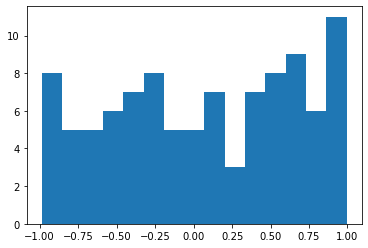

In [57]:
plt.hist(s, bins = 15)

Running the model 10,000 times provides more accurate results:

(array([648., 653., 723., 701., 654., 653., 650., 645., 663., 636., 687.,
        647., 674., 685., 681.]),
 array([-0.99933478, -0.86608133, -0.73282788, -0.59957443, -0.46632098,
        -0.33306752, -0.19981407, -0.06656062,  0.06669283,  0.19994628,
         0.33319973,  0.46645318,  0.59970663,  0.73296008,  0.86621353,
         0.99946698]),
 <BarContainer object of 15 artists>)

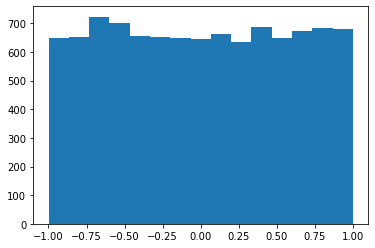

In [58]:
s = np.random.default_rng().uniform(-1,1,10000)
plt.hist(s, bins = 15)

The PDF for the uniform distribution shows that any number inside the specified range has a constant probability of being selected<sup id="a22">[22](#f22)</sup>:

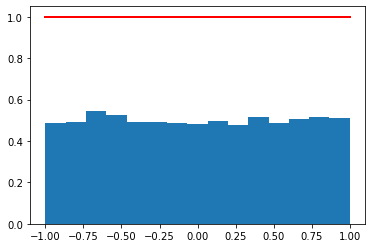

In [59]:
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

Any values outside the range have a zero chance of being selected.

### 4.2. Normal Distribution

Normal distribution, also known as Gaussian distribution or a Bell Curve, is a common type of probability distribution for independent, randomly generated variables<sup id="a23">[23](#f23)</sup>. A normal distribution is symmetrical around the central mean value with half of the values to the left of mean , and half to the right<sup id="a24">[24](#f24)</sup>, as reflected in the example below<sup id="a25">[25](#f25)</sup>:

![numpy.org](https://numpy.org/doc/stable/_images/numpy-random-Generator-normal-1_00_00.png)

The y-axis is the PDF which defines the probability distribution for a random variable. In other words, it defines the likehood of an outcome occuring<sup id="a26">[26](#f26)</sup>. The x-axis is the standard deviation which is an indication of how much the data set deviates from the mean. The total area under the curve is the total probability of all the values that the variable can take; the total curve area is 100%<sup id="a27">[27](#f27)</sup>. 

The formula for normal distribution can be written as:

![brittania.com](https://www.gstatic.com/education/formulas2/397133473/en/normal_distribution.svg)

Where:

*f(x)* is the probability density function

*μ* (mu) is the mean

*σ* (sigma) is the standard deviation

In general:

- approximately 68% of values are within 1 standard deviation of the mean
- approximately 95% of values are within 2 standard deviations of the mean
- approximately 99.7% of values are within 3 standard deviations of the mean<sup id="a28">[28](#f28)</sup>

Normal distributions appear naturally; NumPy can be used to help predict how the variables might occur in real-world situations and to help understanding the behaviour of the data set. For example, the height of population would closely follow a normal distribution. For example, NumPy can be used to provide data on expected deviations from the mean height of a population. 

In this example the mean height and standard deviation in metres are defined in the variables mu (μ) and sigma (σ): 

In [60]:
mu, sigma = 1.79, 0.15 

The ```numpy.random.Generator.normal``` function is used to generate a number of samples, in this case 1000, in the normal distribution:

In [61]:
s = np.random.default_rng().normal(mu, sigma, 1000)

A histogram of the distribution is shown below, with height (metres) shown along the x-axis and PDF along the y-axis. In this example, the data is sorted into 30 'bins' with the range of data grouped into these bins.

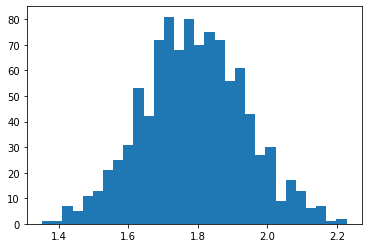

In [62]:
count, bins, ignored = plt.hist(s, 30)

plt.show()

A line plot can be produced for the data using the formula for normal distribution:

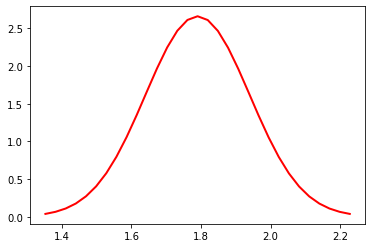

In [63]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')
plt.show()

The two plots can be displayed together:

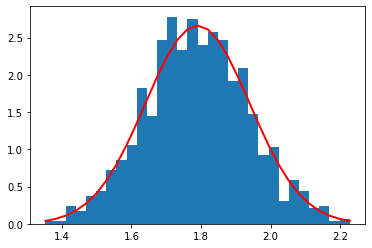

In [64]:
count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

As can be seem, the majority of the values fall around the mean, with fewer values one, two, or three standard deviations from the mean. 

In [65]:
#print (bins)

In [66]:
#np.average(bins)

### 4.3. Weibull Distribution

The Weibull distribution is a probability distribution named after Swedish mathmatician Waloddi Weibull who originally proposed the distribution as a model for material breaking strength. However, the Weibull distribution can also fit a wide range of data from many fields<sup id="a29">[29](#f29)</sup>. 

The probability density for the Weibull distribution can be written as<sup id="a30">[30](#f30)</sup>: 

![www.homeenergy.com](https://www.homerenergy.com/products/pro/docs/latest/images/equations_weibull-pdf.png)

Where:

*k* = the shape parameter

*c* = the scale parameter

The shape factor affects the general shape of a distribution; the scale parameter stretches or squeezes a plot<sup id="a31">[31](#f31)</sup> . In NumPy, the Weibull function can be used to generate random data in a Weibull distribution. The following example uses a shape parameter of 1 and generates 1000 samples:

(array([570., 231., 118.,  51.,  18.,   5.,   3.,   3.,   0.,   1.]),
 array([2.18757640e-03, 8.45752934e-01, 1.68931829e+00, 2.53288365e+00,
        3.37644900e+00, 4.22001436e+00, 5.06357972e+00, 5.90714508e+00,
        6.75071043e+00, 7.59427579e+00, 8.43784115e+00]),
 <BarContainer object of 10 artists>)

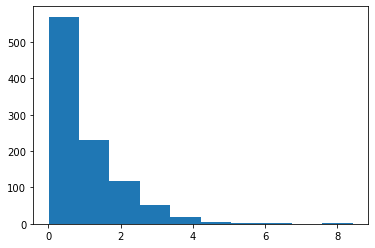

In [67]:
k = 1
s = rng.weibull(k,1000)
plt.hist(s)

In this second example, a shape factor of 2.5 is used:

(array([ 31., 123., 157., 205., 191., 151.,  91.,  33.,  13.,   5.]),
 array([0.02984226, 0.24411016, 0.45837806, 0.67264596, 0.88691386,
        1.10118176, 1.31544966, 1.52971756, 1.74398546, 1.95825336,
        2.17252125]),
 <BarContainer object of 10 artists>)

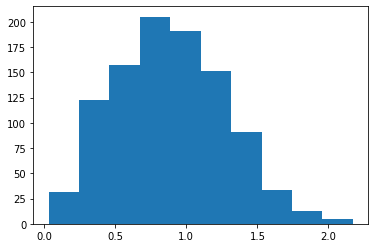

In [68]:
k = 2.5
s = rng.weibull(k,1000)
plt.hist(s)


And in this third example, a shape factor of 5 is used:

(array([  5.,  19.,  50., 107., 197., 217., 221., 131.,  44.,   9.]),
 array([0.20769685, 0.33639599, 0.46509513, 0.59379426, 0.7224934 ,
        0.85119253, 0.97989167, 1.1085908 , 1.23728994, 1.36598907,
        1.49468821]),
 <BarContainer object of 10 artists>)

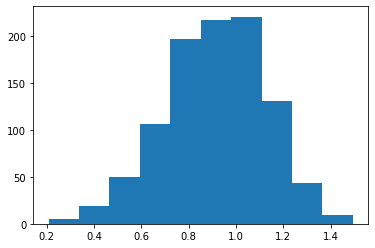

In [69]:
k = 5
s = rng.weibull(k,1000)
plt.hist(s)


As can be seen, the shape factor affects the shape of the data. This can be applied to real-world situations. For example, the Weibull distribution is often used to characterise wind speed regimes, as it has been found to provide a good fit with measured wind data<sup id="a32">[32](#f32)</sup>. For example, the Weibull formula can be defined in a function within Python:

In [70]:
def weib(v, c, k):

 return (k / c) * (v / c)**(k - 1) * np.exp(-(v / c)**k)


A range of data, representing wind speeds at a certain location from 0 m/s to 25 m/s in 0.25 m/s increments can be generated:

In [71]:
v = np.arange(0,101)/4
v

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  ])

The probability of a certain wind speed occurring at that particular location can then be represented in a plot. The following plot represents 4 different ```k``` parameters:

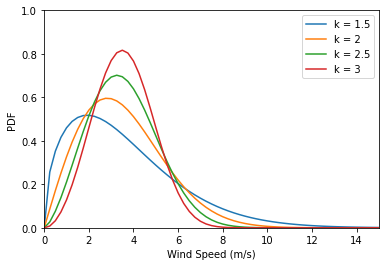

In [72]:
scale = count.max()/weib(v, 1, 1).max()

plt.xlim(0, 15)
plt.ylim(0, 1)

plt.plot(v, weib(v, 4, 1.5)*scale)
plt.plot(v, weib(v, 4, 2)*scale)
plt.plot(v, weib(v, 4, 2.5)*scale)
plt.plot(v, weib(v, 4, 3)*scale)
plt.legend(["k = 1.5", "k = 2", "k = 2.5", "k = 3"])
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PDF")


plt.show()

A higher value of ```k```, such as 3, indicates a site where the variation of hourly mean wind speed
about the annual mean is small; a lower value of ```k```, such as 1.5  indicates greater variability about the mean (reference: SlideXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX).

### 4.4. Binomial Distibution

A Binomial distribution can be thought of as the probability of the success or failure of a certain outcome<sup id="a33">[33](#f33)</sup>. The probability density for the binomial distribution can be written as:

![gstatic.com](https://www.gstatic.com/education/formulas2/397133473/en/binomial_distribution_formula.svg)

Where:

*n* = the number of trials

*p* = the probability of success

*x* = the number of successes

An example of the use of binomial distribution is when tossing a coin. The result of a coin toss can either be heads or tails; there is a 50% chance of heads and a 50% chance of tails. 

Using the random number generator, the toss of a single coin can be simulated 100 times, for example:

In [73]:
n = 1
p = 0.5  

In [74]:
s = rng.binomial(n, p, 100)
s

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

A histogram can be plotted showing the results. In this example, 0 represents heads and 1 represents tails.

([<matplotlib.axis.XTick at 0x2093f6d54c0>,
 [Text(0, 0, ''), Text(0, 0, '')])

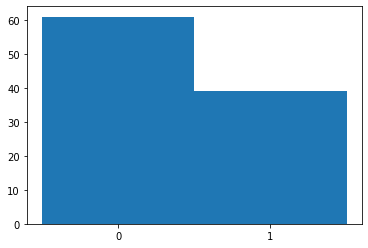

In [75]:
bins = np.arange(3) - 0.5
plt.hist(s, bins)
plt.xticks(range(2))

The number of heads and tails tossed can be calculated, with the total equalling 100 tosses:

In [76]:
sum(s == 0)

61

In [77]:
sum (s == 1)

39

The binomial distribution function in NumPy can also be used to predict the probability of an event occuring. For example, if four individuals have their own standard deck of shuffled playing cards (excluding jokers) each person has a 25% chance of choosing a diamond from the deck, if they pick a single card. Running the function 10,000 times (for example) can provide a model of how many of the four people choose a diamond: 

In [78]:
s = rng.binomial(4,0.25,10000)

A histogram will provide a graphical representation of how many of the individuals all chose a diamond:

([<matplotlib.axis.XTick at 0x2093f679ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

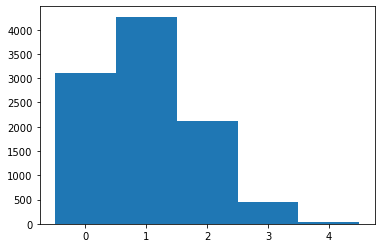

In [79]:
bins = np.arange(6) - 0.5
plt.hist(s, bins)
plt.xticks(range(5))

The following code results in a description of the chances of the individuals drawing a diamond:

In [80]:
a = sum(s == 0)/100
b = sum(s == 1)/100
c = sum(s == 2)/100
d = sum(s == 3)/100
e = sum(s == 4)/100
print ("There is approximately a {}% chance of no individuals drawing a diamond.".format(a))
print ("There is approximately a {}% chance of one of the four individuals drawing a diamond.".format(b))
print ("There is approximately a {}% chance of two of them drawing a diamond.".format(c))
print ("There is approximately a {}% chance of three of them drawing a diamond.".format(d))
print ("There is approximately a {}% chance of all four individuals drawing a diamond.".format(e))


There is approximately a 31.17% chance of no individuals drawing a diamond.
There is approximately a 42.68% chance of one of the four individuals drawing a diamond.
There is approximately a 21.28% chance of two of them drawing a diamond.
There is approximately a 4.43% chance of three of them drawing a diamond.
There is approximately a 0.44% chance of all four individuals drawing a diamond.


In a similar way, the binomial distribution could be used to predict how many of the four individuals would draw an ace of diamonds, if there was a 1 in 52 chance for each of them:

([<matplotlib.axis.XTick at 0x2093f5abd30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

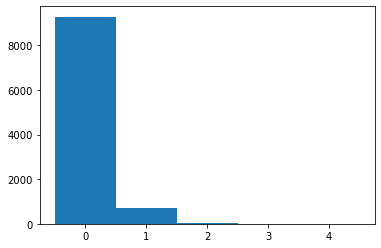

In [81]:
s = rng.binomial(4,1/52,10000)
bins = np.arange(6) - 0.5
plt.hist(s, bins)
plt.xticks(range(5))


In [82]:
a = sum(s == 0)/100
b = sum(s == 1)/100
c = sum(s == 2)/100
d = sum(s == 3)/100
e = sum(s == 4)/100
print ("There is approximately a {}% chance of no individuals drawing an ace of diamonds.".format(a))
print ("There is approximately a {}% chance of one of the four individuals drawing an ace of diamonds.".format(b))
print ("There is approximately a {}% chance of two of them drawing an ace of diamonds.".format(c))
print ("There is approximately a {}% chance of three of them drawing an ace of diamonds. ".format(d))
print ("There is approximately a {}% chance of all four individuals drawing an ace of diamonds.".format(e))

There is approximately a 92.82% chance of no individuals drawing an ace of diamonds.
There is approximately a 6.98% chance of one of the four individuals drawing an ace of diamonds.
There is approximately a 0.2% chance of two of them drawing an ace of diamonds.
There is approximately a 0.0% chance of three of them drawing an ace of diamonds. 
There is approximately a 0.0% chance of all four individuals drawing an ace of diamonds.


### 4.5. Multinomial Distribution

The multinomial distribution arises from an extension of the binomial distribution and is used to find probabilities in experiments where there are more than two outcomes<sup id="a34">[34](#f34)</sup> . Multinomial experiements consist of repeated trials (e.g. rolling a die multiple times instead of just once) and each trial must be independent of the others (i.e. the outcome of a the roll of of die does not affect the others)<sup id="a35">[35](#f35)</sup>. The probability density can be written as<sup id="a36">[36](#f36)</sup>:

![statisticshow.com](https://www.statisticshowto.com/wp-content/uploads/2015/05/multinomial-formula-2.png)

Where: 
    
*n* = number of events 

*n<sub>1</sub>* = number of outcomes, event 1

*n<sub>2</sub>* = number of outcomes, event 2

*n<sub>x</sub>* = number of outcomes, event 2

*p<sub>1</sub>* = probability event 1 happens

*p<sub>2</sub>* = probability event 2 happens

*p<sub>x</sub>* = probability event x happens



An example of multinomial distribution is in modelling how many times a card of each of the four suits in a standard deck of 52 playing cards is drawn:

In [83]:
s = rng.multinomial(20000, [1/4]*4, size=1)
s

array([[5073, 4927, 4989, 5011]], dtype=int64)

In the above example, which is run 20,000 times, it can be seen that: 

In [84]:
print ("A card from the first suit (e.g. diamonds) was drawn {} times.".format(s[0, 0]))
print ("A card from the first suit (e.g. hearts) was drawn {} times.".format(s[0, 1]))
print ("A card from the first suit (e.g. clubs) was drawn {} times.".format(s[0, 2]))
print ("A card from the first suit (e.g. spades) was drawn {} times.".format(s[0, 3]))
print ("A total of {} cards were drawn.".format(np.sum(s)))
print ("The mean is {}.".format(np.average(s)))

A card from the first suit (e.g. diamonds) was drawn 5073 times.
A card from the first suit (e.g. hearts) was drawn 4927 times.
A card from the first suit (e.g. clubs) was drawn 4989 times.
A card from the first suit (e.g. spades) was drawn 5011 times.
A total of 20000 cards were drawn.
The mean is 5000.0.


The number of times the experiment is performed can be set using the size parameter. For example, to run the above experiment five times:

In [85]:
rng.multinomial(20000, [1/4]*4, size=5)

array([[4996, 5060, 4998, 4946],
       [5020, 5012, 4945, 5023],
       [5000, 5086, 4989, 4925],
       [5055, 4988, 4990, 4967],
       [5105, 4983, 5018, 4894]], dtype=int64)

Bias can also be taken into account. For example, the results of an experiment to model how many times each of the 52 cards in a standard shuffled deck of playing cards is drawn at random are shown below:

In [86]:
x = rng.multinomial(20000, [1/52]*52, size=1)
x

array([[354, 351, 356, 394, 406, 371, 341, 397, 392, 365, 386, 378, 381,
        361, 403, 391, 371, 376, 406, 353, 392, 375, 396, 407, 397, 378,
        398, 371, 404, 379, 404, 342, 390, 371, 408, 426, 391, 386, 412,
        386, 384, 395, 370, 399, 388, 377, 383, 389, 427, 411, 362, 369]],
      dtype=int64)

In [87]:
a = np.ndarray.min(x)
b = np.ndarray.max(x)
c = x.size
print ("As can be seen, there are {} results with each card being drawn between {} and {} times".format(c,a,b))

As can be seen, there are 52 results with each card being drawn between 341 and 427 times


In a standard shuffled deck of playing cards including two jokers, there is a 1 in 54 chance of choosing any individual card. However, as there are two jokers, the chances of choosing a joker is greater than any other individual card:

In [88]:
x = rng.multinomial(20000, [1/54]*53, size=1)
x

array([[374, 398, 362, 385, 356, 385, 364, 377, 384, 397, 364, 382, 387,
        375, 360, 339, 412, 361, 371, 344, 379, 374, 382, 377, 359, 363,
        348, 343, 362, 346, 355, 357, 354, 385, 366, 353, 386, 386, 380,
        377, 355, 372, 353, 372, 395, 366, 364, 376, 379, 362, 406, 364,
        727]], dtype=int64)

In [89]:
y = x[0,:52]
z = x[0,52]
a = np.ndarray.min(y)
b = np.ndarray.max(y)
c = x.size
d = y.size
print ("As can be seen, there are {} results with each of the {} suited cards being drawn between {} and {} times. ".format(c,d,a,b))
print ("However, a joker was drawn {} times. ".format(z))


As can be seen, there are 53 results with each of the 52 suited cards being drawn between 339 and 412 times. 
However, a joker was drawn 727 times. 


## 5. Seeds

<b id="f1">1</b> https://numpy.org/about/ [↩](#a1)

<b id="f2">2</b> https://www.w3schools.com/python/numpy/numpy_intro.asp [↩](#a2)

<b id="f3">3</b> https://numpy.org/doc/stable/reference/random/index.html [↩](#a3)

<b id="f4">4</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers [↩](#a4)

<b id="f5">5</b> https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/ [↩](#a5)

<b id="f6">6</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random [↩](#a6)

<b id="f7">7</b> https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/ [↩](#a7)

<b id="f8">8</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice [↩](#a8)

<b id="f9">9</b> https://www.sharpsightlabs.com/blog/numpy-axes-explained/ [↩](#a9)

<b id="f10">10</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes [↩](#a10)

<b id="f11">11</b> https://docs.python.org/3.4/reference/lexical_analysis.html#grammar-token-shortbytesitem [↩](#a11)

<b id="f12">12</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle [↩](#a12)

<b id="f13">13</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation [↩](#a13)

<b id="f14">14</b> https://jman4190.medium.com/explaining-the-inplace-parameter-for-beginners-5de7ffa18d2e [↩](#a14)

<b id="f15">15</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted [↩](#a15)

<b id="f16">16</b> https://miro.medium.com/max/3000/0*fr4sfcnDc0KsXA8P.png [↩](#a16)

<b id="f17">17</b> https://stackoverflow.com/questions/62734866/how-to-create-a-3d-array-in-python-with-numpy [↩](#a17)

<b id="f18">18</b> https://www.sharpsightlabs.com/blog/np-random-uniform/ [↩](#a18)

<b id="f19">19</b> https://www.w3schools.com/python/numpy/numpy_random_distribution.asp [↩](#a19)

<b id="f20">20</b> https://www.oreilly.com/library/view/hands-on-data-science/9781787280748/4264e787-1d92-4d86-9d44-a222b4c79068.xhtml [↩](#a20)

<b id="f21">21</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform [↩](#a21)

<b id="f22">22</b> https://www.sharpsightlabs.com/blog/np-random-uniform/ [↩](#a22)

<b id="f23">23</b> https://www.britannica.com/topic/normal-distribution [↩](#a23)

<b id="f24">24</b> https://www.mathsisfun.com/data/standard-normal-distribution.html [↩](#a24)

<b id="f25">25</b> https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal [↩](#a25)

<b id="f26">26</b> https://www.investopedia.com/terms/p/pdf.asp [↩](#a26)

<b id="f27">27</b> https://medium.com/fintechexplained/ever-wondered-why-normal-distribution-is-so-important-110a482abee3 [↩](#a27)

<b id="f28">28</b> https://www.mathsisfun.com/data/standard-normal-distribution.html [↩](#a28)

<b id="f29">29</b> https://www.statisticshowto.com/weibull-distribution/ [↩](#a29)

<b id="f30">30</b> https://www.homerenergy.com/products/pro/docs/latest/weibull_distribution.html [↩](#a30)

<b id="f31">31</b> https://www.statisticshowto.com/weibull-distribution/ [↩](#a31)

<b id="f32">32</b> https://www.homerenergy.com/products/pro/docs/latest/weibull_distribution.html [↩](#a32)

<b id="f33">33</b> https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/ [↩](#a33)


<b id="f34">34</b> https://online.stat.psu.edu/stat504/lesson/1/1.7 [↩](#a34)

<b id="f35">35</b> https://www.statisticshowto.com/multinomial-distribution/ [↩](#a35)

<b id="f36">36</b> https://www.statisticshowto.com/multinomial-distribution/ [↩](#a36)




<sup id="a7">[7](#f7)</sup>







Almost all random-number generation on computers is done using algorithms to produce numbers that approximate the properties of random numbers (https://www.pcg-random.org/rng-basics.html); the numbers generated are not completely random and are known as "pseudo-random numbers". Most commonly - and in the ```numpy.random``` package - random-number generation algorithms use a seed to derive the initial state with a sequence of statistcally random numbers generated from this known starting point; the use of a known seed means that the the algorithm is repeatable and if the seed is known to an individual, the sequence of numbers is predictable.  



https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bit_generator.html#numpy.random.Generator.bit_generator
https://www.pcg-random.org/
https://www.pcg-random.org/rng-basics.html
https://en.wikipedia.org/wiki/Mersenne_Twister

In computers, hardware is used to harvest entropy; for example movement from the mouse pointer or keys typed on the keyboard (https://hackaday.com/2017/11/02/what-is-entropy-and-how-do-i-get-more-of-it/). Such sources of data are likely to be difficult to predict or replicate. By default, if no seed is specified, the random number generator will use a seed which is generated using entropy from the computer's operating system (https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator). 
https://www.redhat.com/en/blog/understanding-random-number-generators-and-their-limitations-linux

The below code generates random numbers and displays them in a bar plot without specifying a seed: 

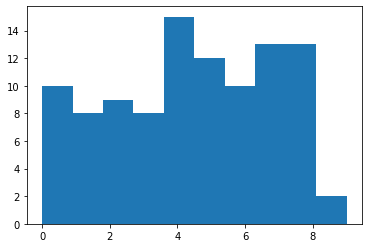

array([7, 4, 4, 4, 7, 8, 0, 7, 1, 7, 8, 4, 4, 6, 8, 7, 1, 2, 7, 0, 1, 3,
       7, 0, 7, 2, 7, 9, 8, 8, 5, 4, 5, 4, 1, 5, 5, 7, 2, 8, 2, 4, 8, 1,
       0, 5, 0, 1, 0, 6, 1, 8, 6, 8, 7, 5, 2, 2, 3, 9, 8, 5, 5, 5, 2, 4,
       4, 4, 3, 3, 1, 5, 3, 0, 3, 5, 0, 3, 3, 4, 8, 6, 0, 6, 2, 4, 6, 7,
       6, 6, 4, 8, 6, 4, 5, 8, 6, 2, 7, 0], dtype=int64)

In [90]:
x = rng.integers(10, size=100)
plt.hist(x)
plt.show()
x

Reproducing the code (without specifying a seed) generates different numbers:

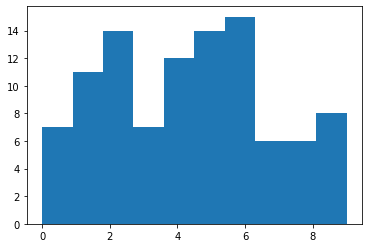

array([5, 0, 3, 8, 6, 7, 5, 6, 6, 1, 6, 4, 4, 6, 0, 6, 5, 5, 2, 6, 4, 7,
       2, 8, 3, 5, 4, 4, 7, 7, 8, 1, 3, 9, 7, 5, 9, 2, 6, 1, 6, 5, 1, 4,
       3, 3, 7, 6, 9, 1, 6, 6, 9, 2, 5, 1, 5, 0, 0, 5, 2, 5, 4, 4, 5, 2,
       6, 1, 2, 3, 2, 5, 1, 1, 1, 3, 6, 9, 8, 8, 0, 9, 1, 9, 2, 4, 4, 9,
       0, 2, 6, 4, 2, 2, 2, 2, 5, 0, 8, 4], dtype=int64)

In [91]:
x = rng.integers(10, size=100)
plt.hist(x)
plt.show()
x

The below two plots demonstrate the use of a seed which is given in the ```rng = np.random.default_rng(12345)``` line of code as (12345)

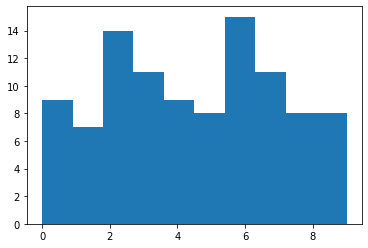

array([6, 2, 7, 3, 2, 7, 6, 6, 9, 3, 8, 3, 5, 5, 2, 1, 2, 6, 6, 9, 7, 2,
       9, 9, 7, 6, 1, 0, 2, 4, 0, 8, 4, 6, 2, 3, 1, 7, 7, 2, 7, 0, 3, 1,
       7, 3, 4, 4, 4, 2, 5, 8, 4, 1, 0, 1, 0, 0, 1, 5, 8, 8, 6, 6, 3, 9,
       6, 7, 7, 8, 7, 9, 5, 5, 2, 9, 5, 4, 3, 2, 6, 4, 5, 6, 8, 3, 6, 9,
       4, 2, 2, 3, 6, 2, 8, 3, 0, 0, 0, 6], dtype=int64)

In [92]:
rng = np.random.default_rng(12345)
x = rng.integers(10, size=100)
plt.hist(x)
plt.show()
x

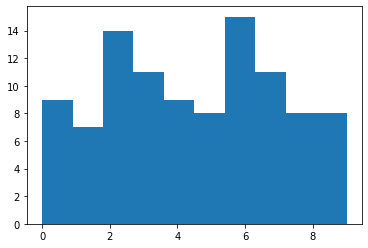

array([6, 2, 7, 3, 2, 7, 6, 6, 9, 3, 8, 3, 5, 5, 2, 1, 2, 6, 6, 9, 7, 2,
       9, 9, 7, 6, 1, 0, 2, 4, 0, 8, 4, 6, 2, 3, 1, 7, 7, 2, 7, 0, 3, 1,
       7, 3, 4, 4, 4, 2, 5, 8, 4, 1, 0, 1, 0, 0, 1, 5, 8, 8, 6, 6, 3, 9,
       6, 7, 7, 8, 7, 9, 5, 5, 2, 9, 5, 4, 3, 2, 6, 4, 5, 6, 8, 3, 6, 9,
       4, 2, 2, 3, 6, 2, 8, 3, 0, 0, 0, 6], dtype=int64)

In [93]:
rng = np.random.default_rng(12345)
x = rng.integers(10, size=100)
plt.hist(x)
plt.show()
x

As can be seen, even though the functionalitiy of the random number generator generates 100 integers "at random", the array of integers generated in x is the same (but are different from the first two plot in this section which do not specify seeds). Without the use of the seed, it is extremely unlikely that the numbers generated on each generated will be the same. The larger the sample of data generated, the more unlikely this will be. 